In [1]:
import os
import re
import wikipediaapi as wiki_api

class WikipediaReader():
    def __init__(self, dir = "articles"):
        self.pages = set()
        self.article_path = os.path.join("./", dir)
        self.wiki = wiki_api.Wikipedia(user_agent = 'jmoses126@gmail.com',
                language = 'en',
                extract_format=wiki_api.ExtractFormat.WIKI)
        try:
            os.mkdir(self.article_path)
        except Exception as e:
            pass

    def reset(self):
        """Reset the reader by clearing all stored pages."""
        self.pages = set()

    def _get_page_title(self, article):
        return re.sub(r'\s+','_', article)

    def add_article(self, article):
        try:
            page = self.wiki.page(self._get_page_title(article))
            if page.exists():
                self.pages.add(page)
                return(page)
        except Exception as e:
            print(e)

    def list(self):
        return self.pages

    def process(self, update=False):
        for page in self.pages:
            filename = re.sub('\\s+', '_', f'{page.title}')
            filename = re.sub(r'[\(\):]','', filename)
            file_path = os.path.join(self.article_path, f'{filename}.txt')
            if update or not os.path.exists(file_path):
                print(f'Downloading {page.title} ...')
                content = page.text
                with open(file_path, 'w') as file:
                    file.write(content)
            else:
                print(f'Not updating {page.title} ...')

    def crawl_pages(self, article, depth = 3, total_number = 1000):
        print(f'Crawl {total_number} :: {article}')

        page = self.add_article(article)
        childs = set()

        if page:
            for child in page.links.keys():
                if len(self.pages) < total_number:
                    print(f'Add article {len(self.pages)}/{total_number} {child}')
                    self.add_article(child)
                    childs.add(child)

        depth -= 1
        if depth > 0:
            for child in sorted(childs):
                if len(self.pages) < total_number:
                    self.crawl_pages(child, depth, len(self.pages))

    def get_categories(self, title):
        page = self.add_article(title)
        if page:
            if (list(page.categories.keys())) and (len(list(page.categories.keys())) > 0):
                categories = [c.replace('Category:','').lower() for c in list(page.categories.keys())
                   if c.lower().find('articles') == -1
                   and c.lower().find('pages') == -1
                   and c.lower().find('wikipedia') == -1
                   and c.lower().find('cs1') == -1
                   and c.lower().find('webarchive') == -1
                   and c.lower().find('dmy dates') == -1
                   and c.lower().find('short description') == -1
                   and c.lower().find('commons category') == -1

                ]
                return dict.fromkeys(categories, 1)
        return {}

ModuleNotFoundError: No module named 'wikipediaapi'

In [4]:
import sys
print(sys.executable)


/Users/jmoses2013/Desktop/OMSA/ISYE6414 - Simulation/pseudo-random-number-gen/app/.venv/bin/python


In [2]:
import nltk
from  nltk.corpus.reader.plaintext import CategorizedPlaintextCorpusReader
from time import time

class WikipediaCorpus(CategorizedPlaintextCorpusReader):
    
    def __init__(self, root, fileids, cat_pattern=None, **kwargs):
        """
        Initialize the WikipediaCorpus reader.
        
        :param root: The root directory for corpus files
        :param fileids: File pattern(s) to match
        :param cat_pattern: Regex pattern to extract categories from filenames
        """
        super().__init__(root, fileids, cat_pattern=cat_pattern, **kwargs)

    def vocab(self):
        return nltk.FreqDist(re.sub(r'[^A-Za-z0-9,;\.]+', ' ', word).lower() for word in corpus.words())

    def max_words(self):
        max = 0
        for doc in self.fileids():
            l = len(self.words(doc))
            max = l if l > max else max
        return max

    def describe(self, fileids=None, categories=None):
        started = time()

        return {
            'files': len(self.fileids()),
            'paras': len(self.paras()),
            'sents': len(self.sents()),
            'words': len(self.words()),
            'vocab': len(self.vocab()),
            'max_words': self.max_words(),
            'time': time()-started
            }
        pass

corpus = WikipediaCorpus(root='articles', fileids=r'[^\\.ipynb].*', cat_pattern=r'[.*]')
print(corpus.fileids())

['"Hello,_World!"_program.txt', '15.ai.txt', '2001_A_Space_Odyssey.txt', '2001_A_Space_Odyssey_novel.txt', '2024_Indian_general_election.txt', '3D_optical_data_storage.txt', 'A*_search_algorithm.txt', 'A.I._Artificial_Intelligence.txt', 'ABB.txt', 'ABC_programming_language.txt', 'ACM_Computing_Classification_System.txt', 'ACM_Conference_on_Fairness,_Accountability,_and_Transparency.txt', 'ACM_SIGEVO.txt', 'ADMB.txt', 'AI-assisted_software_development.txt', 'AI_Overviews.txt', 'AI_Safety_Institute.txt', 'AI_Safety_Summit.txt', 'AI_Seoul_Summit.txt', 'AI_aftermath_scenarios.txt', 'AI_agent.txt', 'AI_alignment.txt', 'AI_boom.txt', 'AI_bubble.txt', 'AI_capability_control.txt', 'AI_effect.txt', 'AI_safety.txt', 'AI_slop.txt', 'AI_takeover.txt', 'AI_winter.txt', 'ALGOL.txt', 'ALGOL_60.txt', 'ALGOL_68.txt', 'ANSI_C.txt', 'APL_programming_language.txt', 'AVR_microcontrollers.txt', 'A_priori_and_a_posteriori.txt', 'Abductive_reasoning.txt', 'Ablation.txt', 'Abstract_and_concrete.txt', 'Academic

In [2]:
import ssl

# Fix SSL certificate issue for NLTK downloads on macOS
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download required NLTK data
nltk.download('punkt_tab', quiet=True)

class WikipediaPlaintextCorpus(CategorizedPlaintextCorpusReader):
    def __init__(self, root_path):
        # Need to provide both root AND fileids
        super().__init__(root_path, r'.*\.txt', cat_pattern=r'.*')
    
    def vocab(self):
        return nltk.FreqDist(re.sub(r'[^A-Za-z0-9,;\.]+', ' ', word).lower() for word in self.words())
    
    def max_words(self):
        max_count = 0
        for doc in self.fileids():
            word_count = len(self.words(doc))
            max_count = word_count if word_count > max_count else max_count
        return max_count
    
    def describe(self, fileids=None, categories=None):
        started = time()
        
        return {
            'files': len(self.fileids()),
            'paras': len(self.paras()),
            'sents': len(self.sents()),
            'words': len(self.words()),
            'vocab': len(self.vocab()),
            'max_words': self.max_words(),
            'time': time() - started
        }

root_path = './articles'
corpus = WikipediaPlaintextCorpus(root_path)
print(corpus.describe())

NameError: name 'nltk' is not defined

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class WikipediaCorpusTransformer(BaseEstimator, TransformerMixin):
    """
    A scikit-learn compatible transformer that loads Wikipedia corpus data.
    This class is designed to be used in a sklearn Pipeline.
    """
    def __init__(self, root_path):
        self.root_path = root_path
        self.corpus = None

    def fit(self, X=None, y=None):
        """Load the corpus from the root path."""
        self.corpus = WikipediaPlaintextCorpus(self.root_path)
        return self

    def transform(self, X=None):
        """Return the list of file IDs from the corpus."""
        if self.corpus is None:
            self.fit()
        return self.corpus.fileids()

    def get_corpus(self):
        """Return the loaded corpus object."""
        if self.corpus is None:
            self.fit()
        return self.corpus

In [12]:
class Categorizer(BaseEstimator, TransformerMixin):
    """
    Assigns categories to documents based on Wikipedia page categories.
    """
    def __init__(self, wikipedia_reader):
        self.reader = wikipedia_reader

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """Transform file IDs to include category information."""
        categorized_docs = []
        for fileid in X:
            # Extract article title from filename
            title = fileid.replace('.txt', '').replace('_', ' ')
            categories = self.reader.get_categories(title)
            categorized_docs.append({
                'fileid': fileid,
                'title': title,
                'categories': categories
            })
        return categorized_docs


class TextPreprocessor(BaseEstimator, TransformerMixin):
    """
    Preprocesses text from the corpus files.
    """
    def __init__(self, root_path):
        self.root_path = root_path

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """Read and preprocess text from files."""
        processed_docs = []
        for doc in X:
            fileid = doc['fileid'] if isinstance(doc, dict) else doc
            filepath = os.path.join(self.root_path, fileid)
            
            try:
                with open(filepath, 'r', encoding='utf-8') as f:
                    text = f.read()
                    # Basic preprocessing: lowercase and clean
                    text = text.lower()
                    processed_docs.append({
                        'text': text,
                        'fileid': fileid,
                        'categories': doc.get('categories', {}) if isinstance(doc, dict) else {}
                    })
            except Exception as e:
                print(f"Error processing {fileid}: {e}")
                
        return processed_docs


class TextTokenizer(BaseEstimator, TransformerMixin):
    """
    Tokenizes text into words and sentences.
    """
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """Tokenize documents into words."""
        tokenized_docs = []
        for doc in X:
            text = doc['text'] if isinstance(doc, dict) else doc
            # Simple word tokenization
            words = nltk.word_tokenize(text)
            
            tokenized_docs.append({
                'tokens': words,
                'fileid': doc.get('fileid', '') if isinstance(doc, dict) else '',
                'categories': doc.get('categories', {}) if isinstance(doc, dict) else {}
            })
        return tokenized_docs


class BagOfWordVectorizer(BaseEstimator, TransformerMixin):
    """
    Converts tokenized documents to bag-of-words representation.
    """
    def __init__(self, corpus):
        self.corpus = corpus
        self.vocabulary = None

    def fit(self, X, y=None):
        """Build vocabulary from corpus."""
        self.vocabulary = self.corpus.vocab()
        return self

    def transform(self, X):
        """Transform documents to bag-of-words vectors."""
        vectors = []
        for doc in X:
            tokens = doc['tokens'] if isinstance(doc, dict) else doc
            # Create frequency distribution for this document
            word_freq = nltk.FreqDist(tokens)
            vectors.append({
                'vector': dict(word_freq),
                'fileid': doc.get('fileid', '') if isinstance(doc, dict) else '',
                'categories': doc.get('categories', {}) if isinstance(doc, dict) else {}
            })
        return vectors

In [13]:
from sklearn.pipeline import Pipeline

root_path = './articles'

pipeline = Pipeline([
    ('corpus', WikipediaCorpusTransformer(root_path=root_path)),
    ('categorizer', Categorizer(WikipediaReader())),
    ('preprocessor', TextPreprocessor(root_path=root_path)),
    ('tokenizer', TextTokenizer()),
    ('vectorizer', BagOfWordVectorizer(WikipediaPlaintextCorpus(root_path))),
])

In [31]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

# Run the pipeline to get the vectorized documents
transformed_data = pipeline.fit_transform(None)

# Create a DataFrame with the results, including preprocessed text
X = pd.DataFrame([{
    'fileid': doc['fileid'],
    'bow': doc['vector'],
    'categories': doc['categories']
} for doc in transformed_data])

# Add preprocessed text by reading from the pipeline's preprocessor output
# We need to re-run just the preprocessing steps to get the text
preprocessed_data = pipeline.named_steps['preprocessor'].transform(
    pipeline.named_steps['categorizer'].transform(
        pipeline.named_steps['corpus'].transform(None)
    )
)

# Add the preprocessed text to the DataFrame
X['preprocessed'] = [doc['text'] for doc in preprocessed_data]

# Now create the feature matrix
vectorizer = DictVectorizer(sparse=False)
x_train = vectorizer.fit_transform(X['bow'].to_numpy())

In [32]:
from sklearn.cluster import KMeans

# Create and fit KMeans model
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(x_train)

# Verify that labels were created
print(f"Number of documents clustered: {len(kmeans.labels_)}")
print(f"Cluster assignments: {kmeans.labels_}")

Number of documents clustered: 289
Cluster assignments: [1 4 5 4 2 1 4 4 4 1 1 1 1 1 1 1 1 1 1 7 7 4 7 1 1 1 4 7 7 4 7 7 2 1 2 2 7
 2 7 1 1 1 4 1 7 1 1 7 4 1 1 1 2 0 7 7 7 4 4 1 7 1 1 1 4 1 2 5 1 1 2 7 1 1
 1 1 7 1 7 1 6 7 4 5 7 1 2 5 1 1 1 7 1 7 1 4 1 1 7 1 1 7 1 1 1 4 1 2 1 7 1
 1 1 6 4 1 1 7 1 1 1 5 5 4 5 7 4 1 1 1 1 7 4 7 7 5 6 7 1 7 2 7 7 2 1 7 7 4
 1 1 4 4 1 1 4 2 5 1 0 7 2 1 7 1 1 1 4 1 1 7 2 1 7 1 1 1 4 4 4 1 5 1 1 4 7
 7 1 7 5 1 1 1 1 1 5 1 1 4 2 3 4 2 1 7 7 1 7 1 1 1 1 1 3 4 1 5 1 1 1 4 1 1
 1 2 1 1 7 1 1 2 7 4 7 1 4 4 7 1 1 1 1 3 0 4 5 1 1 2 2 0 2 7 7 2 4 7 1 7 0
 4 4 7 4 7 7 1 1 7 7 7 7 4 1 4 4 1 2 4 7 4 1 2 7 4 0 7 1 7 7]


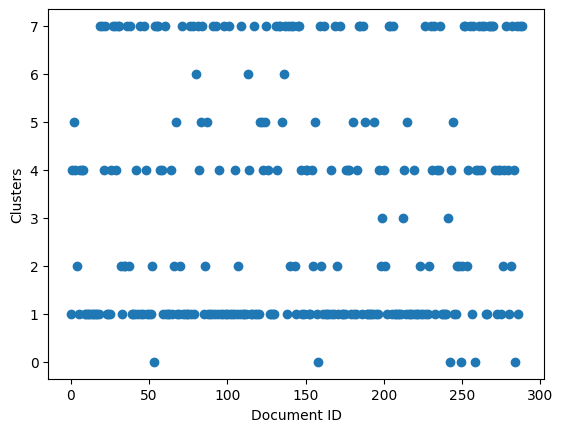

In [33]:
import matplotlib.pyplot as plt

plt.ylabel('Clusters')
plt.xlabel('Document ID')
plt.plot(kmeans.labels_, 'o')

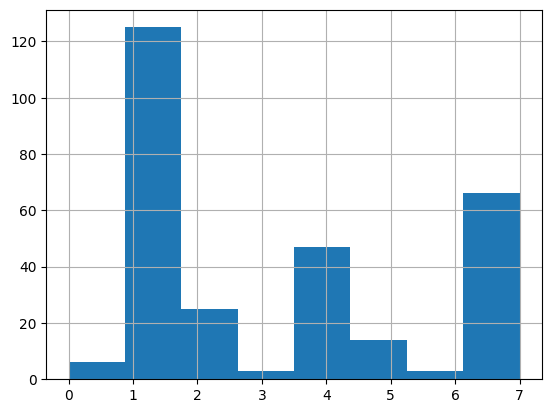

In [34]:
plt.hist(x=kmeans.labels_,  bins=8, density=False)
plt.grid(True)
plt.show()


In [35]:
def get_cluster_articles(c_id, lables):
    # Extract title from fileid by removing .txt and replacing underscores
    return [X['fileid'][i].replace('.txt', '').replace('_', ' ') for i,l in enumerate(lables) if l == c_id]

print(get_cluster_articles(0, kmeans.labels_))

['Adversarial machine learning', 'Automatic differentiation', 'Drag physics', 'Electromagnetic radiation', 'Fairness machine learning', 'String computer science']


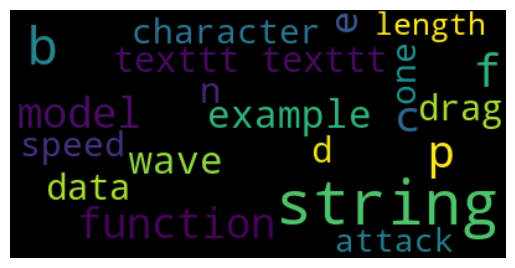

In [36]:
from wordcloud import WordCloud

def wordcloud_for_cluster(c_id, lables):
    text = ' '.join([X['preprocessed'][i] for i,l in enumerate(lables) if l == c_id ])

    wordcloud = WordCloud(max_font_size=50, max_words=20).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

wordcloud_for_cluster(0, kmeans.labels_)


In [37]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer(sparse=False)
x_train = vectorizer.fit_transform(X['bow'])

print(type(x_train))
#numpy.ndarray

print(x_train)
#[[ 15.   0.  10. ...   0.   0.   0.]
# [662.   0. 430. ...   0.   0.   0.]
# [316.   0. 143. ...   0.   0.   0.]
# ...
# [319.   0. 217. ...   0.   0.   0.]
# [158.   0. 147. ...   0.   0.   0.]
# [328.   0. 279. ...   0.   0.   0.]]

print(x_train.shape)
# (272, 52743)

print(vectorizer.get_feature_names_out())
# array([',', ',1', '.', ..., 'zy', 'zygomaticus', 'zygote'], dtype=object)

print(len(vectorizer.get_feature_names_out()))
# 52743


<class 'numpy.ndarray'>
[[27.  0.  0. ...  0.  0.  0.]
 [ 3.  0.  1. ...  0.  0.  0.]
 [ 4.  4. 21. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
(289, 49214)
['!' '#' '$' ... '高分' '高分辨率对地观测系统' '鹊桥号']
49214


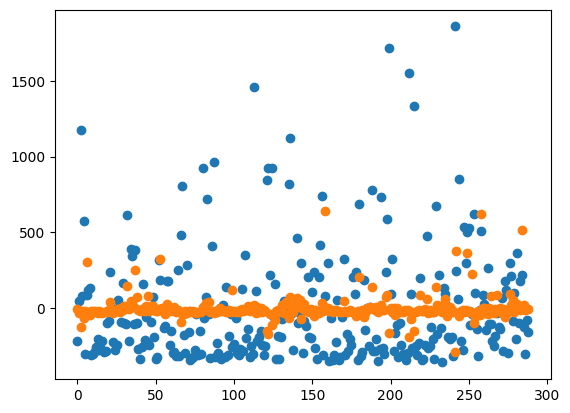

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def pca_reduce(vec_list, dimensions=2):
    return PCA(dimensions).fit_transform(vec_list)

def d2_plot(data):
    plt.plot(data, 'o')

d2_plot(pca_reduce(x_train,2))





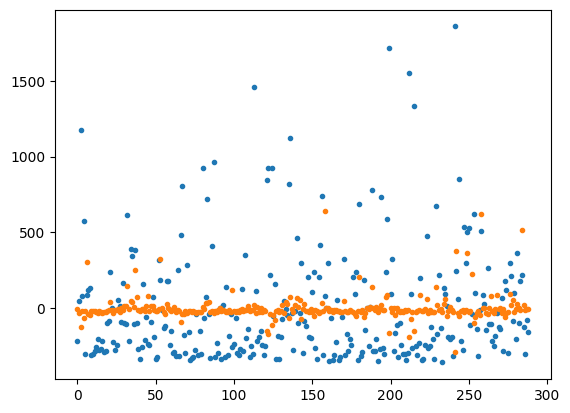

In [48]:
def d2_plot(data):
    plt.plot(data, '.')

d2_plot(pca_reduce(x_train,2))

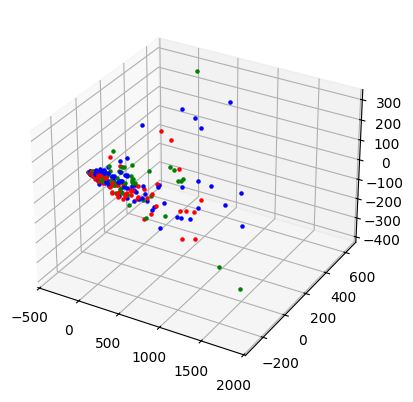

In [49]:
def d3_plot(data):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for _, v in enumerate(data[:90]):
        ax.scatter(v[0],v[1], v[2],marker='.', color='r')
    for _, v in enumerate(data[90:180]):
        ax.scatter(v[0],v[1], v[2],marker='.', color='g')
    for _, v in enumerate(data[180:]):
        ax.scatter(v[0],v[1], v[2],marker ='.', color='b')

    plt.show()

d3_plot(pca_reduce(x_train,3))


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

x_train = X['preprocessed'].tolist()

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)

print(x_train.shape)
# (272, 40337)

print(x_train)


(289, 38852)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 256194 stored elements and shape (289, 38852)>
  Coords	Values
  (0, 16897)	0.6559822918330022
  (0, 37982)	0.27705065209097296
  (0, 27528)	0.15713627127594826
  (0, 19079)	0.07510935019577994
  (0, 36547)	0.009151228932627795
  (0, 31643)	0.039981066852653235
  (0, 8865)	0.06361819702831546
  (0, 34570)	0.04909819993022891
  (0, 12744)	0.02103508562502941
  (0, 24999)	0.03557932062827105
  (0, 11535)	0.01661272915822756
  (0, 34944)	0.14714231208267683
  (0, 34575)	0.3356683994386065
  (0, 30739)	0.01661272915822756
  (0, 24744)	0.01490604027370081
  (0, 9141)	0.0383541900297163
  (0, 22389)	0.04448417403309118
  (0, 31633)	0.007512532254807633
  (0, 31926)	0.01630894150468294
  (0, 26411)	0.014978313067990912
  (0, 24705)	0.12874952307234222
  (0, 8376)	0.042938865196539736
  (0, 18033)	0.12501052339924104
  (0, 23246)	0.006216784765164929
  (0, 15513)	0.007278985220219028
  :	:
  (288, 6249)	0.01946883156697

In [3]:
import gensim.downloader as api
import numpy as np

vocab = corpus.vocab()
vector_lookup = api.load('glove-wiki-gigaword-50')

def word_vector(tokens):
    return np.array([
        vector_lookup[token]
        for token in tokens
        if token in vocab and token in vector_lookup
    ])

X['word_vector'] = X['tokens'].apply(lambda tokens: word_vector(tokens))


ModuleNotFoundError: No module named 'gensim'